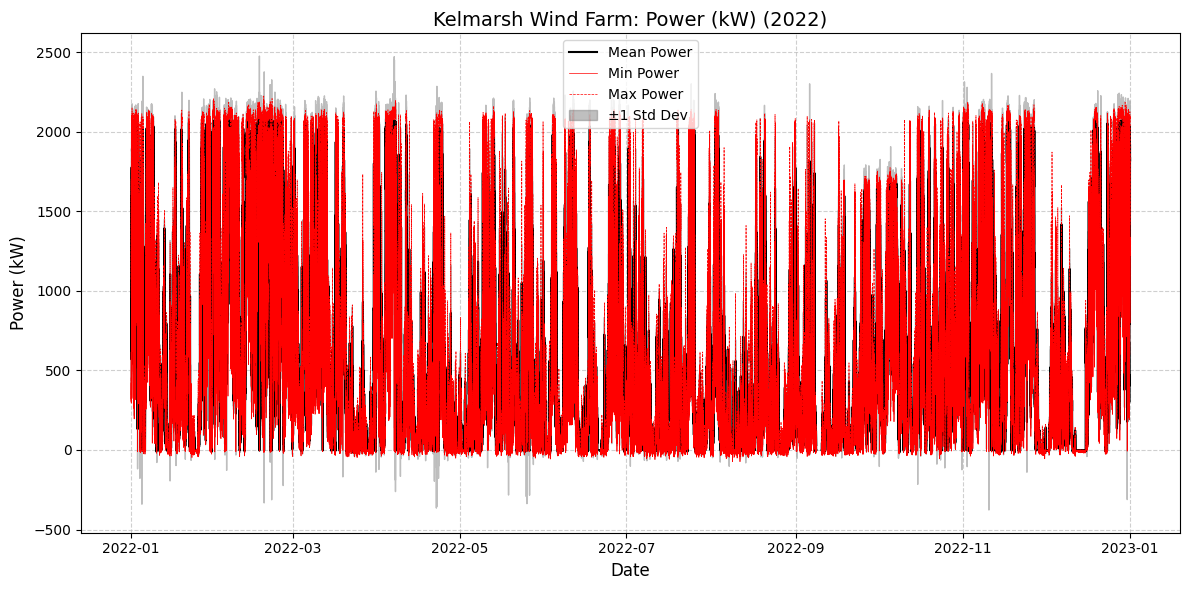

In [2]:
# ---------------------------------------------
# Part 1: Load and Plot Wind Farm Power Data
# ---------------------------------------------
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from functions import load_data
from config import *
from imports import *

# -------------------------------
# Configuration
# -------------------------------
MIN_COL = 'Power, Minimum (kW)'
MAX_COL = 'Power, Maximum (kW)'
STD_COL = 'Power, Standard deviation (kW)'


# -------------------------------
# Plot Time Series
# -------------------------------
def plot_power_series(df: pd.DataFrame) -> None:
    """
    Plot power production with mean, min/max, and ±1 std deviation bands.
    """
    plt.figure(figsize=(12, 6))

    plt.plot(df.index, df[TARGET_COL], color='black', label='Mean Power')
    plt.plot(df.index, df[MIN_COL], color='red', linewidth=0.5, label='Min Power')
    plt.plot(df.index, df[MAX_COL], color='red', linewidth=0.5,
             linestyle='--', label='Max Power')

    plt.fill_between(
        df.index,
        df[TARGET_COL] - df[STD_COL],
        df[TARGET_COL] + df[STD_COL],
        color='gray', alpha=0.5, label='±1 Std Dev'
    )

    plt.title(f'Kelmarsh Wind Farm: {TARGET_COL} (2022)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(f'{TARGET_COL}', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Execute
# -------------------------------
df = load_data(DATA_PATH)
plot_power_series(df)
